# Francisco Alfredo Castrellon Carrillo
# David Gamaliel Arcos Bravo

In [1]:
import imp
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import seaborn as sb
import cv2
from collections import defaultdict, deque
from scipy import ndimage as ndi

from copy import deepcopy
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [81]:
def erosion(img, estructure):
    w, h = estructure.shape
    if w%2==0 or h%2==0:
        return -1
    wArr = list(range(-(int(w/2)), (int(w/2))+1))
    hArr = list(range(-(int(h/2)), (int(h/2))+1))
    imgR = np.zeros(img.shape, dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[i])):
            b = True
            for x in wArr:
                for y in hArr:
                    if (0 <= i+y < len(img) and 0 <= j+x < len(img[i])):
                        if estructure[y+int(h/2)][x+int(w/2)] == 1 and img[i+y][j+x] == 0:
                            b = False
            imgR[i][j] = 255 if b else 0
    return imgR

def dilatation(img, estructure):
    w, h = estructure.shape
    if w%2==0 or h%2==0:
        return -1
    wArr = list(range(-(int(w/2)), (int(w/2))+1))
    hArr = list(range(-(int(h/2)), (int(h/2))+1))
    imgR = np.zeros(img.shape, dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[i])):
            if img[i][j] == 255:
                for x in wArr:
                    for y in hArr:
                        if (0 <= i+y < len(img) and 0 <= j+x < len(img[i])):
                            if estructure[y+int(h/2)][x+int(w/2)] == 1:
                                imgR[i+y][j+x] = 255
    return imgR

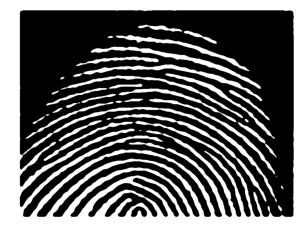

In [82]:
img = cv2.imread('../Datasets/huella1.png', cv2.IMREAD_GRAYSCALE)
binImg = np.zeros(img.shape)
binImg[img > 125] = 255
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.imshow(binImg, cmap="gray")

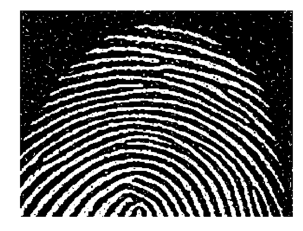

In [87]:
img2 = cv2.imread('../Datasets/huella2.png', cv2.IMREAD_GRAYSCALE)
binImg2 = np.zeros(img2.shape)
binImg2[img2 > 125] = 255
plt.axis("off")
plt.imshow(binImg2, cmap="gray")
estructure = np.array([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]])

[  0 255] [259439  51773]


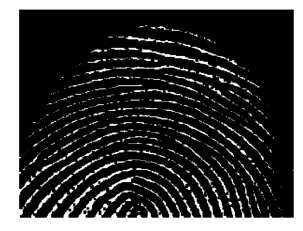

In [85]:
resImg = erosion(binImg2, estructure)
plt.axis("off")
plt.imshow(resImg, cmap="gray")
c, u = np.unique(resImg, return_counts=True)
print(c,u)

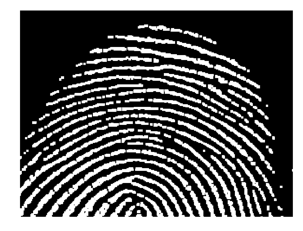

In [86]:
resImg2 = dilatation(resImg, estructure)
plt.axis("off")
plt.imshow(resImg2, cmap="gray")